In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [3]:
def width2var(w):
    var = (w/2)**2
    return var

In [4]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 500, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (15))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [5]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(locs)
print(rents)

[[136.55570473 467.47384228]
 [ 85.42273656 632.29589793]
 [ 87.6270287  382.98083533]
 [ 54.62990913 441.29801586]
 [111.80232821 533.17627781]
 [ 85.52832162 628.04743017]
 [147.16002958 381.72446652]
 [ 10.20477526 541.46690497]
 [491.3391769  523.82439782]
 [546.74127487 435.57361533]
 [499.89803219 469.87271863]
 [495.83011041 494.01762779]
 [516.88722801 553.90344149]
 [509.07741218 451.60201724]
 [436.48236802 503.32671525]
 [581.38287904 473.42844874]
 [499.33660647 551.60953915]
 [495.18285845 486.95574971]
 [500.8752123  570.77859603]
 [476.79528854 573.20075411]
 [485.60749624 481.5164473 ]
 [497.57252173 492.49695268]
 [545.27605353 519.67952152]
 [380.61741775 213.58032317]
 [404.2343657  175.79206149]
 [382.57995065 171.82697699]
 [438.22921922 210.7136845 ]
 [346.29677509 205.47802636]
 [389.8162092  185.47873963]
 [388.32443569 213.05835195]
 [432.17404551 162.62122705]
 [413.50099838 196.43495136]
 [381.05943731 162.11706657]
 [406.74576108 209.14940566]
 [398.75964286

(874, 620, 3)


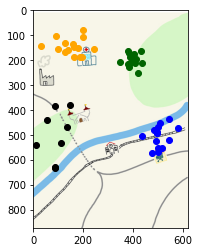

In [6]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

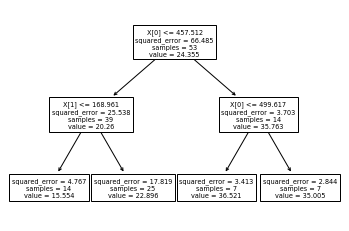

In [8]:
tree.plot_tree(model)
None

In [10]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
print(type(dict))
json_object = json.dumps(dict, indent = 4) 
print(json_object)



{'avgRent': 24, 'feature': 0, 'threshold': 74, 'children': [{'avgRent': 20, 'feature': 1, 'threshold': 19, 'children': [{'avgRent': 16, 'feature': -1, 'threshold': -1}, {'avgRent': 23, 'feature': -1, 'threshold': -1}]}, {'avgRent': 36, 'feature': 0, 'threshold': 81, 'children': [{'avgRent': 37, 'feature': -1, 'threshold': -1}, {'avgRent': 35, 'feature': -1, 'threshold': -1}]}]}


TypeError: Object of type longlong is not JSON serializable

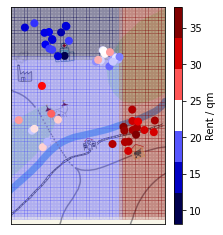

In [ ]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None